In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [8]:
# Преобразуем оценки качества вина
# 7 и более - хорошее качество (1) и менее 7 - плохое качество (0)
df['quality'] = np.where(df['quality'] >=7, 1, 0)
df.drop_duplicates(inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


In [9]:
df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,6.890108,0.292909,0.333650,6.316350,0.048453,34.847335,142.441734,0.994354,3.186070,0.487742,10.269934
1,6.699434,0.267621,0.330566,4.667557,0.037306,34.199029,122.362460,0.992060,3.228997,0.500728,11.566235


In [10]:
df.quality.value_counts()

quality
0    1107
1     618
Name: count, dtype: int64

<AxesSubplot:>

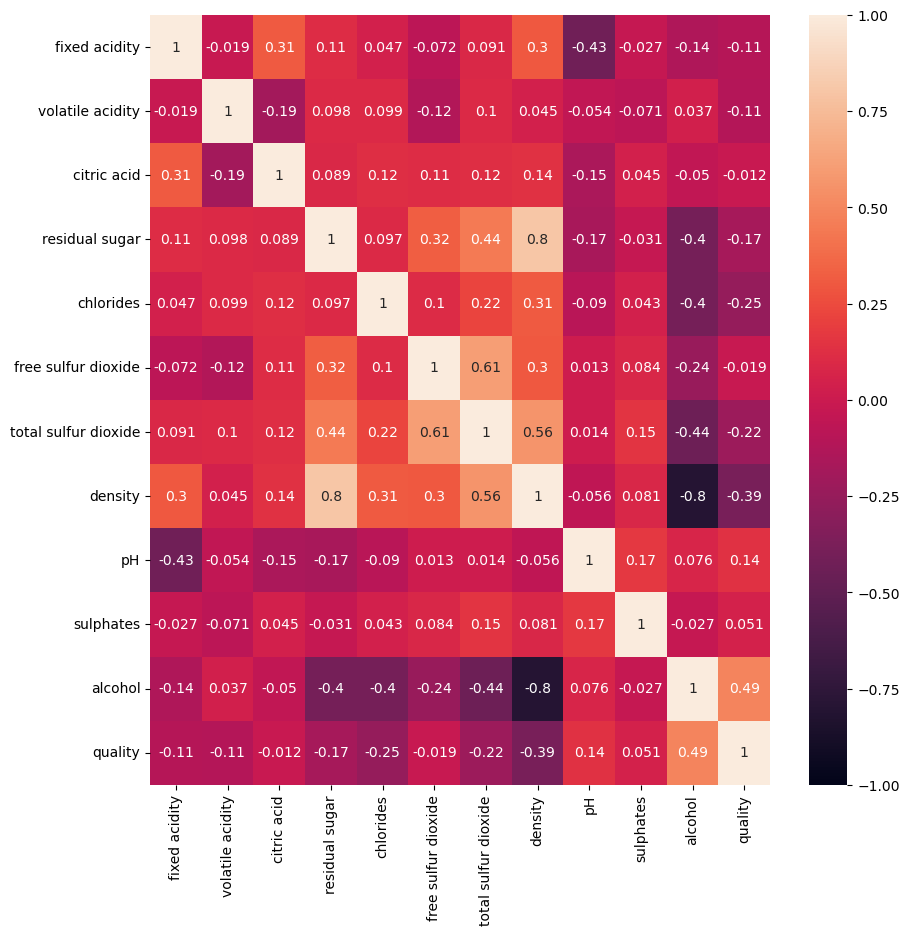

In [11]:
# Постороим матрицу корреляции
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax=1)

<AxesSubplot:xlabel='residual sugar'>

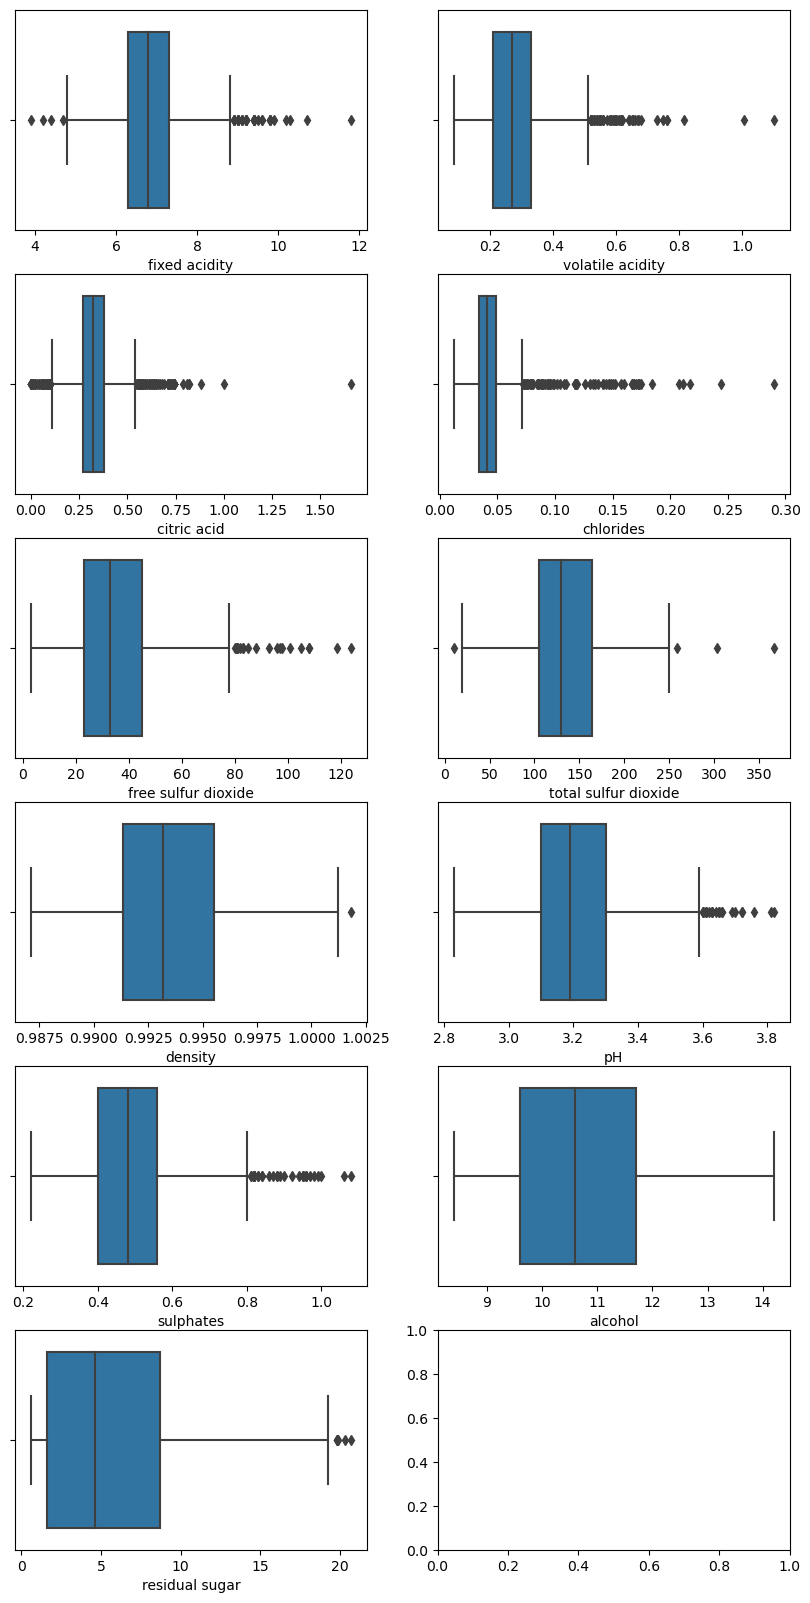

In [12]:
# Посмотрим на выбросы
fig, axarr  = plt.subplots(6,2,figsize=(10,20))
sns.boxplot(x=df['fixed acidity'],ax=axarr[0,0])
sns.boxplot(x=df['volatile acidity'],ax=axarr[0,1])
sns.boxplot(x=df['citric acid'],ax=axarr[1,0])
sns.boxplot(x=df['chlorides'],ax=axarr[1,1])
sns.boxplot(x=df['free sulfur dioxide'],ax=axarr[2,0])
sns.boxplot(x=df['total sulfur dioxide'],ax=axarr[2,1])
sns.boxplot(x=df['density'],ax=axarr[3,0])
sns.boxplot(x=df['pH'],ax=axarr[3,1])
sns.boxplot(x=df['sulphates'],ax=axarr[4,0])
sns.boxplot(x=df['alcohol'],ax=axarr[4,1])
sns.boxplot(x=df['residual sugar'],ax=axarr[5,0])

In [13]:
# Удаляю столбцы sulphates, citric acid, free sulfur dioxide из-за корреляции с оценкой вина близкой к нулю

# df.drop(['sulphates', 'citric acid', 'free sulfur dioxide'], axis= 1 , inplace= True )
# попробовала удалить столбцы, однако это не улучшило результаты моделей, поэтому в дальнейшем не используется

In [14]:
# также пробовала убрать выбросы, но это тоже не повлияло на результат

In [15]:
random_seed = 10

X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

print(X.shape)
print(y.shape)

(1725, 11)
(1725,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_seed, stratify = y, test_size=0.3)

In [17]:
# Попробуем алгоритм ближайших соседей

In [18]:
# Объявим контейнер, важно определить его позиции, которые мы сможем менять в решетки
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('knn',    KNeighborsClassifier())])

# определим кросс-валидацию
kfold = KFold(n_splits=10, shuffle=True, random_state = random_seed)

# Определим параметры для перебора по решетке

p = np.arange(1,5)
weights = ['uniform','distance']
n_neighbors = np.arange(1,10)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]


# параметры решетки
param_grid =[
    {'preprocessing': scaling, 
     'knn': [KNeighborsClassifier()],
         'knn__n_neighbors': n_neighbors,
         'knn__p': p,
         'knn__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn': [KNeighborsClassifier()],
                          'knn__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'knn__p': array([1, 2, 3, 4]),
                          'knn__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True)

In [19]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на " 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'knn': KNeighborsClassifier(), 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'distance', 'preprocessing': StandardScaler()}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.758809

Правильность для наилучшей модели на тестовом наборе: 0.756757



In [20]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,202,199,195,175,130,192,171,196,146,149,...,66,6,9,33,12,15,39,18,21,45
mean_fit_time,0.0027,0.002897,0.0025,0.0037,0.0028,0.002799,0.0025,0.002901,0.0044,0.004301,...,0.0026,0.002707,0.0027,0.002699,0.0029,0.002899,0.0027,0.002701,0.002693,0.0026
std_fit_time,0.000458,0.000299,0.0005,0.000639,0.0004,0.0004,0.0005,0.0003,0.00049,0.00046,...,0.00049,0.000463,0.000458,0.000458,0.000299,0.0003,0.000458,0.000458,0.000453,0.00049
mean_score_time,0.003409,0.005701,0.003,0.007002,0.003401,0.004902,0.002901,0.003001,0.005101,0.002991,...,0.018404,0.004393,0.0022,0.0024,0.015704,0.013003,0.016003,0.014388,0.0123,0.014603
std_score_time,0.000485,0.00046,0.000001,0.000776,0.00049,0.0003,0.0003,0.0,0.0003,0.000029,...,0.0012,0.000497,0.0004,0.00049,0.000901,0.000633,0.001095,0.000652,0.00064,0.000916
param_knn,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_knn__n_neighbors,9,9,9,8,6,9,8,9,7,7,...,3,1,1,2,1,1,2,1,1,2
param_knn__p,2,2,1,2,2,1,1,1,1,1,...,4,2,2,2,3,3,3,4,4,4
param_knn__weights,distance,uniform,distance,uniform,distance,uniform,distance,distance,uniform,distance,...,uniform,uniform,distance,distance,uniform,distance,distance,uniform,distance,distance
param_preprocessing,StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),RobustScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
params,"{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...",...,"{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb..."


In [21]:
# Пока что лучшее всего себя показали такие параметры
# n_neighbors = np.arange(5,10)
# p = 1, 2, 3

# weights = ['distance'] все время переобучается (1 в train_score)
# weights = ['uniform'] будем брать этот параметр

In [22]:
# Объявим контейнер, важно определить его позиции, которые мы сможем менять в решетки
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('knn',    KNeighborsClassifier())])

# определим кросс-валидацию
kfold = KFold(n_splits=10, shuffle=True, random_state = random_seed)

# Определим параметры для перебора по решетке

p = [1, 2, 3]
weights = ['uniform']
n_neighbors = np.arange(7,36)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]


# параметры решетки
param_grid =[
    {'preprocessing': scaling, 
     'knn': [KNeighborsClassifier()],
         'knn__n_neighbors': n_neighbors,
         'knn__p': p,
         'knn__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn': [KNeighborsClassifier()],
                          'knn__n_neighbors': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]),
                          'knn__p': [1, 2, 3], 'knn__weights': ['uniform'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True)

In [23]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на " 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'knn': KNeighborsClassifier(), 'knn__n_neighbors': 22, 'knn__p': 1, 'knn__weights': 'uniform', 'preprocessing': MinMaxScaler()}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.757176

Правильность для наилучшей модели на тестовом наборе: 0.749035



In [24]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,135,91,54,100,156,153,231,213,73,109,...,206,242,176,215,44,80,3,7,197,224
mean_fit_time,0.002653,0.003399,0.0036,0.0029,0.002998,0.002998,0.002788,0.002752,0.003399,0.003301,...,0.004301,0.004599,0.004301,0.0051,0.004503,0.004851,0.0028,0.0033,0.004403,0.004417
std_fit_time,0.000449,0.000489,0.000664,0.0003,0.000002,0.000001,0.000396,0.000401,0.00049,0.00046,...,0.000457,0.000487,0.00046,0.0007,0.0005,0.000452,0.0004,0.000639,0.00049,0.00048
mean_score_time,0.005508,0.006203,0.006801,0.006002,0.006202,0.006003,0.030213,0.029861,0.006302,0.006302,...,0.031468,0.032008,0.005801,0.035012,0.028409,0.030258,0.005302,0.032508,0.031008,0.031691
std_score_time,0.000495,0.0004,0.000599,0.000448,0.0004,0.000001,0.00126,0.001219,0.000458,0.000458,...,0.000909,0.000777,0.0004,0.002095,0.000803,0.001032,0.000459,0.001751,0.000773,0.000635
param_knn,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_knn__n_neighbors,22,17,13,18,24,24,32,30,15,19,...,29,33,26,30,11,15,7,7,28,31
param_knn__p,1,1,1,1,2,1,3,3,1,1,...,3,3,2,3,3,3,2,3,3,3
param_knn__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),RobustScaler()
params,"{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...",...,"{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb...","{'knn': KNeighborsClassifier(), 'knn__n_neighb..."


In [25]:
# При увеличении соседей от 25 до 35, результат модели не улучшается. Закончим с knn на этом этапе.
# Выбираем подходящую модель из первых двух

In [26]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('knn',     KNeighborsClassifier(n_neighbors=22, p=1, weights = 'uniform'))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       332
           1       0.68      0.58      0.62       186

    accuracy                           0.75       518
   macro avg       0.73      0.71      0.72       518
weighted avg       0.74      0.75      0.74       518

0.749034749034749


In [62]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('knn',     KNeighborsClassifier(n_neighbors=17, p=1, weights = 'uniform'))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       332
           1       0.64      0.61      0.63       186

    accuracy                           0.74       518
   macro avg       0.71      0.71      0.71       518
weighted avg       0.74      0.74      0.74       518

0.7374517374517374


In [27]:
# Попробуем логистическую регрессию

In [58]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression(max_iter=10000))])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .7, n_splits = 10, random_state = random_seed)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': [None], 
         'clf__solver': ['lbfgs','newton-cg', 'sag', 'saga']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.3,
            train_size=0.7),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=10000))]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': [None],
                          'clf__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [59]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,27,31,1,5,13,17,10,2,6,14,...,12,16,8,20,23,3,7,15,19,11
mean_fit_time,0.128802,0.03719,0.006002,0.003702,0.0091,0.016999,0.003596,0.008201,0.005005,0.021682,...,0.003715,0.0033,0.001804,0.015906,0.009114,0.004398,0.004699,0.003899,0.003659,0.001706
std_fit_time,0.061517,0.002525,0.000448,0.000453,0.001136,0.001727,0.000484,0.000598,0.000447,0.002488,...,0.000477,0.000456,0.000396,0.007237,0.002866,0.000488,0.000459,0.000539,0.000559,0.000468
mean_score_time,0.000801,0.000903,0.0005,0.000698,0.000735,0.000701,0.000603,0.000418,0.000605,0.000803,...,0.000693,0.0006,0.0005,0.000399,0.000585,0.000701,0.000899,0.000802,0.000701,0.000692
std_score_time,0.000401,0.000301,0.0005,0.000457,0.000487,0.000459,0.000493,0.000514,0.000494,0.000401,...,0.000454,0.00049,0.0005,0.000489,0.000479,0.000459,0.0003,0.000401,0.000459,0.000454
param_clf__penalty,None,None,l2,l2,l2,l2,l2,l2,l2,l2,...,l2,l2,l2,l1,l1,l2,l2,l2,l2,l2
param_clf__solver,lbfgs,newton-cg,newton-cg,lbfgs,sag,saga,liblinear,newton-cg,lbfgs,sag,...,sag,saga,liblinear,liblinear,liblinear,newton-cg,lbfgs,sag,saga,liblinear
param_preprocessing,Normalizer(),Normalizer(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...",...,"{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline..."
split0_test_score,0.752066,0.754821,0.735537,0.735537,0.735537,0.735537,0.738292,0.738292,0.738292,0.738292,...,0.732782,0.732782,0.741047,0.719008,0.644628,0.639118,0.639118,0.639118,0.639118,0.639118
split1_test_score,0.779614,0.77686,0.782369,0.782369,0.782369,0.782369,0.779614,0.779614,0.779614,0.779614,...,0.76584,0.76584,0.76584,0.77135,0.650138,0.644628,0.644628,0.644628,0.644628,0.644628


In [60]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на " 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'clf__penalty': None, 'clf__solver': 'lbfgs', 'preprocessing': Normalizer()}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.760331

Правильность для наилучшей модели на тестовом наборе: 0.741313



In [66]:
pipe = Pipeline([('preprocessing', Normalizer()), 
                 ('clf',     LogisticRegression(solver = 'lbfgs', penalty = None, max_iter=10000))])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

# однако эта модель оказалась немного хуже чем следующие

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       332
           1       0.67      0.54      0.60       186

    accuracy                           0.74       518
   macro avg       0.72      0.70      0.70       518
weighted avg       0.73      0.74      0.73       518

0.7413127413127413


In [67]:
pipe = Pipeline([('preprocessing', Normalizer()), 
                 ('clf',     LogisticRegression(solver = 'newton-cg', penalty = None))])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       332
           1       0.69      0.56      0.62       186

    accuracy                           0.75       518
   macro avg       0.73      0.71      0.72       518
weighted avg       0.75      0.75      0.74       518

0.750965250965251


In [69]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('clf',     LogisticRegression(solver = 'lbfgs', penalty = 'l2'))])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

# Выбираю эту модель так как она кажется мне подходящей по precision и f1-score

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       332
           1       0.68      0.59      0.63       186

    accuracy                           0.75       518
   macro avg       0.73      0.71      0.72       518
weighted avg       0.75      0.75      0.75       518

0.750965250965251


In [32]:
# Попробуем наивный байесовский классификатор

In [33]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv = StratifiedShuffleSplit(test_size = .3, train_size = .7, n_splits = 10, random_state = random_seed)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.3,
            train_size=0.7),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [34]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.001984,0.0015,0.002501,0.001302
std_fit_time,0.000751,0.000669,0.000499,0.000457
mean_score_time,0.001099,0.000502,0.000701,0.000601
std_score_time,0.000299,0.000502,0.000459,0.000491
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.69146,0.69146,0.69146,0.586777
split1_test_score,0.699725,0.699725,0.699725,0.619835
split2_test_score,0.680441,0.680441,0.680441,0.520661


In [35]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на " 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.713774

Правильность для наилучшей модели на тестовом наборе: 0.706564



In [36]:
pipe = Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
print(pipe.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       332
           1       0.57      0.77      0.65       186

    accuracy                           0.71       518
   macro avg       0.70      0.72      0.70       518
weighted avg       0.74      0.71      0.71       518

0.7065637065637066


In [ ]:
# Модель наивного байеса оказалась слабой

In [ ]:
# В итоге выбрала одну из моделей логист регрессии